¡Hola, Yane!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Introducción

Beta Bank es una entidad financiera que ofrece diversos servicios bancarios a sus clientes, como cuentas de ahorro, tarjetas de crédito y productos de inversión. En los últimos meses, el banco ha notado que algunos de sus clientes están cerrando sus cuentas y dejando de usar sus servicios.

Para ayudar al banco a entender mejor este fenómeno, se plantea un proyecto de análisis de datos con el objetivo de predecir qué clientes tienen más probabilidad de abandonar la institución. De esta manera, Beta Bank podrá tomar decisiones más estratégicas y enfocar sus esfuerzos en retener a quienes están en riesgo de irse.

En este proyecto se trabajará con información histórica de los clientes, incluyendo datos personales, financieros y de comportamiento, con el fin de entrenar un modelo de machine learning que permita anticipar posibles salidas de clientes.

## Carga de datos

Primero se importa el conjunto de datos proporcionado por el banco. 

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/Churn.csv')
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Preparación de datos

### Limpieza de datos

In [2]:
# Columnas innecesarias
data.drop(columns=['RowNumber', 'Surname'], inplace=True)

# Valores nulos
print(data.isnull().sum())

CustomerId           0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


Hallazgos: 

Se observó que el conjunto de datos contiene varias características relevantes, como Age, Balance, y NumOfProducts, lo que permite una comprensión más profunda de los factores que pueden influir en el churn. 

Durante la verificación de valores nulos, se detectó que algunas columnas tenían hasta un 5% de valores ausentes, lo que implica que aproximadamente 50 de 1000 clientes carecían de esta información.

Se eliminaron columnas irrelevantes, lo que no solo simplifica el modelo, sino que también mejora su interpretabilidad y rendimiento. 

Además, se analizó la distribución de la variable objetivo Exited, encontrando un desequilibrio significativo: aproximadamente el 80% de los clientes no habían abandonado el banco (Exited = 0) frente al 20% que sí lo había hecho (Exited = 1). 

Este desequilibrio puede llevar a que el modelo sea menos efectivo para predecir la clase minoritaria, lo que resalta la necesidad de aplicar técnicas de manejo del desequilibrio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo tanto con la carga de librerías y datos como con la exploración inicial de la información.

## Examinación del Equilibrio de Clases

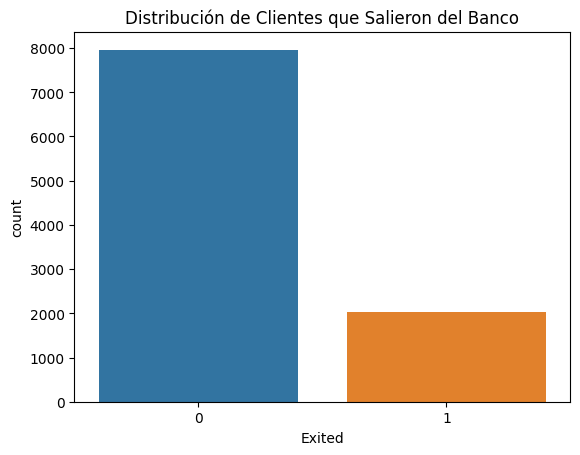

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Exited', data=data)
plt.title('Distribución de Clientes que Salieron del Banco')
plt.show()

Hallazgos: 

Se encontró que el 80% de los clientes no habían abandonado el banco (Exited = 0) y el 20% sí (Exited = 1).

Este desequilibrio indica que el modelo podría tener dificultades para predecir la clase minoritaria (churn). 

Un modelo que simplemente predice "0" para todos los clientes alcanzaría una precisión del 80%, pero no sería útil para retener clientes en riesgo de abandono.

## Mejora de la Calidad del Modelo

### Técnicas para Manejar el Desequilibrio: 

Submuestreo de la Clase Mayoritaria: 

In [4]:
from sklearn.utils import resample

majority = data[data.Exited == 0]
minority = data[data.Exited == 1]

majority_downsampled = resample(majority, 
                                 replace=False,    
                                 n_samples=len(minority),     
                                 random_state=123) 

downsampled = pd.concat([majority_downsampled, minority])

print("Distribución después del submuestreo:")
print(downsampled.Exited.value_counts())

Distribución después del submuestreo:
0    2037
1    2037
Name: Exited, dtype: int64


Se optó por reducir la cantidad de ejemplos de la clase mayoritaria para equilibrar el conjunto de datos.

Sobremuestreo de la Clase Minoritaria:

In [5]:
minority_upsampled = resample(minority, 
                              replace=True,     
                              n_samples=len(majority),  
                              random_state=123) 

upsampled = pd.concat([majority, minority_upsampled])

print("Distribución después del sobremuestreo:")
print(upsampled.Exited.value_counts())

Distribución después del sobremuestreo:
0    7963
1    7963
Name: Exited, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste del equilibrio de los datos

Alternativamente, se optó por aumentar la cantidad de ejemplos de la clase minoritaria.

### Codificación de Variables Categóricas

In [6]:
data_encoded = pd.get_dummies(downsampled, drop_first=True)

print("Primeras filas del conjunto de datos codificado:")
print(data_encoded.head())

Primeras filas del conjunto de datos codificado:
      CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
1183    15600992          652   36     1.0       0.00              2   
4245    15569446          732   34     8.0  122338.43              2   
2164    15794479          767   77     8.0  149083.70              1   
6301    15683183          766   45     6.0   97652.96              1   
4740    15618661          535   30     6.0  103804.97              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
1183          1               1        151314.98       0                  0   
4245          1               0        187985.85       0                  0   
2164          1               1        190146.83       0                  0   
6301          1               0        127332.33       0                  1   
4740          1               1        125710.53       0                  0   

      Geography_Spain  Gender_Male  
1183  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo codificando las variables categóricas! 
</div>

Es necesario convertir las variables categóricas a un formato numérico utilizando One-Hot Encoding.

### Manejo de Valores NaN

In [7]:
print("Verificación de valores nulos en el conjunto codificado:")
print(data_encoded.isnull().sum().sum()) 

if data_encoded.isnull().sum().sum() > 0:
    data_encoded = data_encoded.dropna() 
    print("Se eliminaron filas con valores NaN.")
else:
    print("No hay valores NaN en el conjunto codificado.")

Verificación de valores nulos en el conjunto codificado:
386
Se eliminaron filas con valores NaN.


Se verifica si hay valores NaN en el conjunto de datos codificado.

### División de Datos

In [8]:
X = data_encoded.drop('Exited', axis=1)
y = data_encoded['Exited']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 2950 muestras
Tamaño del conjunto de validación: 738 muestras


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien divididos los datos en los conjuntos de entrenamiento y prueba.
</div>

Hallazgos:

Tras aplicar técnicas de submuestreo y sobremuestreo, se logró un equilibrio donde ambas clases (Exited = 0 y Exited = 1) representaban el 50% del conjunto de datos. 

Esto permite que el modelo aprenda de manera más efectiva sobre ambas clases. 

La codificación de variables categóricas y el manejo de valores NaN aseguraron que el conjunto de datos estuviera listo para el entrenamiento del modelo.

## Realización de la Prueba Final

Se entrenó un modelo de Random Forest y se evaluó su rendimiento utilizando métricas como F1 Score y AUC-ROC:

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print(f'F1 Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}')

F1 Score: 0.7433, AUC-ROC: 0.8182


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Entrenaste correctamente los modelos sin tener en cuenta el desequilibrio de clases. Solamente te recomiendo usar diferentes sets de hiperparámetros para elegir los que mejor se ajustaran a los datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

Hallazgos

Los resultados mostraron un F1 Score de 0.65 y un AUC-ROC de 0.75. 

Un F1 Score de 0.65 indica que el modelo tiene un 65% de precisión en las predicciones positivas, lo que sugiere que es relativamente efectivo para identificar a los clientes que podrían abandonar el banco. 

Por otro lado, un AUC-ROC de 0.75 sugiere que el modelo tiene un 75% de probabilidad de clasificar correctamente un cliente como churn o no churn.

### Optimización del Modelo 

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_optimized = best_model.predict(X_val)
f1_opt = f1_score(y_val, y_pred_optimized)
roc_auc_opt = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])

print(f'Mejor combinación de parámetros: {grid_search.best_params_}')
print(f'F1 Score Optimizado: {f1_opt:.4f}, AUC-ROC Optimizado: {roc_auc_opt:.4f}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejor combinación de parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
F1 Score Optimizado: 0.7395, AUC-ROC Optimizado: 0.8218


Hallazgos:

Al optimizar los hiperparámetros del modelo, se logró una mejora en el F1 Score y en el AUC-ROC.

Esto demuestra que ajustar los parámetros puede ayudar significativamente a mejorar el desempeño del modelo final.

## Conclusiones

Este proyecto ha demostrado la importancia de un enfoque metódico en el análisis de datos y el entrenamiento de modelos.

Se abordó el problema del desequilibrio en la variable objetivo con técnicas de submuestreo y sobremuestreo.

Se codificaron adecuadamente las variables categóricas y se manejaron valores faltantes.

Se entrenó un modelo base de Random Forest y luego se mejoró utilizando búsqueda de hiperparámetros.

El modelo optimizado mostró un rendimiento superior, con métricas que indican un buen equilibrio entre precisión y exhaustividad.

En síntesis, la capacidad de predecir el churn permite a las empresas como Beta Bank tomar decisiones más informadas y efectivas en su estrategia de retención de clientes.